# `Primer Bloque`

Derivadas
- Forma analítica
- Diferencia finita
    - Aproximaciones en diferencia no centradas: Diferencia hacia adelante. Diferencia hacia atrás.
    - Aproximación de diferencia central.
    - Segunda derivada.
- Diferenciación Automática 

### Forma Analítica
En la clase anterior, vimos el método de la secante (v1), dicho método consistía en sustituir en el método de Newton la definición de la derivada. A continuación vamos a profundizar un poco más en `cómo` computar derivadas numéricas.


Las derivadas aparecen en todas las áreas de la ciencia, ejemplos:
\begin{equation}
\vec{v}=\frac{\vec{r}}{dt}, \quad\quad \vec{E}=-\nabla\phi-\frac{\partial \vec{A}}{\partial t}
\end{equation}

Como todos sabemos la derivada de una función $f$ en un punto $x$ se define de forma usual como:
$$
\frac{df(x)}{dx}=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}
$$

En la práctica no solemos usar esta definición, sino usamos *reglas* deducidas a partir de esta. Por ejemplo, intentemos probar por la definición el siguiente resultado:

$$
\frac{d}{dx}(x^2\sin x)=x^2\cos x +2x\sin x.
$$

¿Complicado?

Ahora, hay ocasiones en que es bastante más complejo como por ejemplo:
$$\frac{d}{dx} (\sin x)^{\tan x}=¿?$$

De manera general cuando tenemos una expresión analítica $f(x)$ podemos calcular "a mano" las diferentes derivadas, y en el peor de los casos usar programas como Mathematica, o el propio Python con la librería *SymPy* para obtenerlas. 

Ahora, en muchas ocasiones  tenemos, en cambio, un conjunto de $n$ puntos de datos discretos (es decir, una tabla de tuplas $(x_i, f(x_i))$ con $i = 0,1,...,n − 1$). En estos casos podemos abordar el problema desde tres ángulos:

- El primero, podemos utilizar la interpolación o el ajuste (fit) de datos a un modelo (métodos que veremos más adelante). Esto nos permitiría tener una nueva función que se aproxima razonablemente bien a los datos y luego aplicar la diferenciación analítica a esta.

Esta aproximación es especialmente útil cuando se trata de datos ruidosos. Sin embargo, el que una función se aproxima bastante bien a un conjunto de puntos de datos no significa que también capture información sobre sus derivadas. (De hecho, como veremos en próximas clases, algúnos métodos de interpolación y fit, asumen condiciones sobre la primera derivada). En otras palabras, interpolar/ajustar y luego tomar la derivada no proporciona mucha orientación sobre el error involucrado cuando estamos interesados en la derivada producto de no estar seguros de que es la función analítica correcta.

- El segundo enfoque se llama `diferencia finitas` y nos permite sistematizar nuestra ignorancia de la función correcta. Este enfoque también es conocido `diferenciación numérica`. 

En pocas palabras, este método hace uso del desarrollo en serie de Taylor de la función que nos interesa derivar alrededor del punto específico donde deseamos evaluar la derivada. 

- Un tercer enfoque es conocido como `diferenciación automática` y es tan preciso como la diferenciación analítica, pero trata con números en lugar de expresiones matemáticas.

## Diferencia finita

Partiendo de la definición anterior
$$
\frac{df(x)}{dx}=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}
$$

podemos notar que mientras más pequeño es $h$ el numerador es más pequeño, y también el denominador magnificandose así cualquier error que se cometa en la evaluación del numerador.

A continuación veremos como podemos intentar "remediar" esto usando la serie de Taylor (alrededor de $\tilde{x}$) de la función.

#### Aproximaciones en diferencia no centradas

`Diferencia hacia adelante`

Partamos de la serie de Taylor de la función alrededor del punto $x$ donde queremos computar la derivada

<center><img src="capturas/51.png"></center>

¿Están de acuerdo con la expresión anterior? No era 
$$f(x)=\sum \frac{f^{(n)}(\tilde x)}{n!}(x-\tilde x)^n$$

¿Qué paso? Recordar que $h=x-\tilde x$. Donde $\tilde x$ es el punto alrededor del cual computamos la serie, es decir la $x$ usada en la primera expresion.

Una vez aclarado lo anterior, consideremos que estamos muy cerca y quedemosno con los primero ordenes
<center><img src="capturas/52.png"></center>
<center><img src="capturas/53.png"></center>

Esta última expresión es conocida como la `primera aproximación en diferencia hacia adelante`. Como se aprecia solo consiste en usar sólo el resultado del lado derecho para evaluar la derivada, lo que nos deja un `error` del orden $O(h)$ (recordar que $h$ es la distancia entre los dos ptos.)

Graficamente lo que tenemos es que se comienza en $x$ y luego nos movemos en la dirección derecha hasta $x+h$. En otras palabras, la derivada no es más que la pendiente del segmento de recta que conecta $f(x)$ con $f(x+h)$
<center><img src="capturas/54.png"></center>

`COMENTARIO:` La expresión obtenida es "igual" a la definición de derivada, sin embargo producto de que fue obtenida a partir de la serie de Taylor, tenemos una idea del `error` al que corresponde esta aproximación. Es posible que todavía sufra los problemas mencionados anteriormente (numerador pequeño, denominador pequeño), pero al menos ahora tenemos alguna orientación sobre qué tan bien lo estamos haciendo: si la h no es demasiado pequeña (de modo que todavía estemos lejos de las mayores cuestiones de redondeo), reducir a la mitad la h debería duplicar la calidad de la aproximación (en términos absolutos).

`Diferencia hacia atrás`

Es muy similar al caso anterior, solo que ahora hay que tener presente que $h=\tilde x - x$. Partiendo de la serie de Taylor resultante:

<center><img src="capturas/55.png"></center>

Quedandonos a primer orden llegamos a:
<center><img src="capturas/56.png"></center>

Esta expresión es conocida como `la primera aproximación en diferencias hacia atrás`. 

Se llama diferencia hacia atrás porque comienza en $x$ y luego se mueve en dirección negativa hasta $x − h$. Siendo el resultado la pendiente del segmento de recta que conecta $f(x−h)$ y $f(x)$. Las diferencias hacia adelante y hacia atrás son muy similares.

In [1]:
# implementacion
def difFinNC(f, x, h, der=True, izq=False):
    """
    """
    fd = (f(x+h) - f(x))/h if der else (f(x)-f(x-h))/h 
    return fd

### Aproximación de diferencia central

Intentemos ahora encontrar una manera de aproximar la derivada usando una diferencia finita, pero con mayor precisión que con la diferencia hacia adelante/hacia atrás. 

Partiendo del desarrollo de Taylor de nuestra función $f$ alrededor del punto $x$ donde queremos conocer la derivada
<center><img src="capturas/57.png"></center>
<center><img src="capturas/58.png"></center>

Notar que esta vez elegimos hacer un paso de tamaño $h/2$ (a diferencia del $h$ de la sección anterior), y que nos "expandimos" tanto hacia adelante como hacia atrás. 

A simple vista podemos ver que si sumamos (restamos) ambas expresiones obtendremos una expresión que contiene sólo derivadas pares (impares). Como estamos interesados en la primera, restando llegamos a:
<center><img src="capturas/59.png"></center>

Lo que conduce a:
<center><img src="capturas/60.png"></center>

Esta expresión es conocida como  `primera aproximación para diferencia central`. Similar a los casos anteriores, acá solo requerimos dos evaluaciones, sin embargo como se aprecia el error es de orden 2 en $h$, y también como esta $h$ es más pequeña que las anteriores tendremos en general un error menor.


Graficamente lo que hacemos es:
<center><img src="capturas/61.png"></center>

Como se aprecia se llama diferencia central porque las dos evaluaciones están en $x − h/2$ y en $x + h/2$, es decir, están centradas en $x$. Claramente, la diferencia central no es otra cosa que la pendiente del segmento de recta que conecta $f(x−h/2)$ y $f(x+h/2)$.


`COMENTARIO 1`: Noten que si escogemos una $h$ no muy pequeña (de modo que todavía estamos lejos de problemas importantes de redondeo), el reducirla a la mitad debería cuadruplicar la calidad de la aproximación (en términos absolutos).


`COMENTARIO 2`: Existe una situación (muy común en la práctica) en la que una aproximación en diferencia central simplemente no es utilizable. Si tenemos un conjunto de $n$ puntos de datos discretos de la forma $(xi, f(xi))$ para $i = 0,1,...,n − 1$ `no podremos usar una diferencia central` para aproximar la derivada en $x_0$ o en $x_{n−1}$. Para cualquiera de los puntos "intermedios" siempre podríamos usar dos evaluaciones (una a la izquierda, otra a la derecha), pero para los dos puntos finales simplemente no tenemos puntos disponibles "en el otro lado", por lo que es necesaria una diferencia hacia adelante/hacia atrás.

In [2]:
# implementacion
def difFinC(f, x, h):
    """
    """
    fd = (f(x+h/2) - f(x-h/2))/h
    return fd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
## Comparemos
f = lambda x: np.sin(x)**(np.tan(x))
df = lambda x: (1+np.log(np.sin(x))/(np.cos(x)**2))*f(x)

x = 0.2
hval = [10**(-i) for i in range(1, 20)]

# implementacion
datD = np.array([difFinNC(f, x, h) for h in hval])
datC = np.array([difFinC(f, x, h) for h in hval])

# error absoluto
dfx = df(x)
EdatD = abs(datD-dfx)
EdatC = abs(datC-dfx)

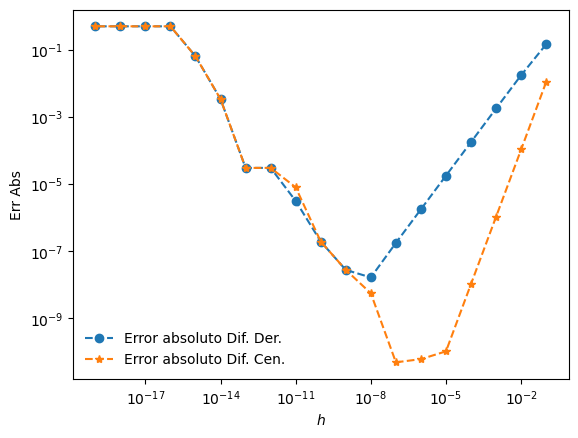

In [14]:
plt.plot(hval, EdatD, ls='--', marker='o', label=r'Error absoluto Dif. Der.')
plt.plot(hval, EdatC, ls='--', marker='*', label=r'Error absoluto Dif. Cen.')

plt.xlabel(r'$h$')
plt.ylabel(r'Err Abs')

plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False)

`Noten` que la parte derecha del gráfico estamos dominados por el error de `truncamiento/aproximación`. En esta región la diferencia central es claramente superior, ya que el error absoluto es consistentemente menor. En esta región, podemos ver:

- cuando $h$ cambia en un orden de magnitud, el error de la diferencia a la derecha cambia en un orden de magnitud, mientras que el error de la diferencia central cambia en dos órdenes de magnitud. 

A medida que nos movemos hacia la izquierda, más allá de cierto punto el error de `redondeo` comienza a dominar y la diferencia hacia adelante es tan buena (o tan mala) como la diferencia central. 

Dejamos de trazar cuando el error es tan grande que fallamos por completo en la evaluación de la derivada.

`Comentario`: los errores de redondeo aparecen del hecho de que los coeficientes se redondean a cero.

`Mejorando la precisión`: ver PDF "Formulae_DerivationDifFinit.pdf"

### Segunda derivada

En la práctica, también necesitamos derivadas de orden superior: la segunda derivada de hecho es una de las más usadas en por los científicos (usualmente todas las ecuaciones llegan hasta ese orden. ¿Saben por qué?).

Similar a la primera se pueden establecer expresiones de diferencia hacia adelante, hacia atrás y central para aproximar la segunda derivada. Una manera de calcularla sería simplemente derivando las expresiones anteriores, por ejemplo:
<center><img src="capturas/62.png"></center>

Sin embargo, nuevamente, acá no tendríamos noción del error. 


¿Alguna otra alternativa?

Si recuerdan, anteriormente vimos que si sumamos o restamos las series de Taylor hacia adelante y hacia atrás podiamos obtener terminos con derivadas pares o impares. En nuestro caso enfoquemonos en la diferencia central sumando estas dos expansiones de Taylor y llegar a:

<center><img src="capturas/63.png"></center>

lo que conduce a orden dos a:
<center><img src="capturas/64.png"></center>

Esta expresión es conocida como la `primera aproximación en diferencia central de la segunda derivada`.

`Comentario:` En el caso de quererse calcular las derivadas de orden superior, será necesario combinar suficientes sumas o diferencias de las series de Taylor para cancelar todos los términos no deseados. Por ejemplo, la cuarta derivada $f^{(4)}(x)$ se puede aproximar usando las expresiones:
$$f(x+h/2)+ f(x−h/2)$$

junto con: $$f(x+h)+ f(x−h)$$

## Tarea:
- Obtenga la expresión de la segunda derivada el caso discreto derecho.
- Obtenga la expresión de la cuarta derivada el caso discreto derecho.
